In [68]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.style.use('fivethirtyeight')

In [69]:
# pathogenic mybpc3
mybpc3 = pd.read_csv('Data-for-Project/Data/MYBPC3.txt', sep = "\t")

# filtering for HCM conditions
mybpc3_HCM = mybpc3['Condition(s)'].str.contains("Hypertrophic cardiomyopathy")

# filtering for non-NaN protein changes
mybpc3_filtered = mybpc3[mybpc3_HCM].dropna(subset = ["Protein change"])

# likely pathogenic mybpc3
mybpc3_lp = pd.read_csv('Data-for-Project/Data/MYBPC3_LP.txt', sep='\t')
mybpc3_HCM_lp = mybpc3_lp['Condition(s)'].str.contains("Hypertrophic cardiomyopathy")
mybpc3_filtered_lp = mybpc3_lp[mybpc3_HCM_lp].dropna(subset=['Protein change'])

# mybpc3_filtered.head(5)
# mybpc3_filtered_lp.head(5)

# combine pathogenic and likely pathogenic
combined_mybpc3 = [mybpc3_filtered, mybpc3_filtered_lp]
combined_mybpc3 = pd.concat(combined_mybpc3)
combined_mybpc3 = combined_mybpc3.reset_index()

combined_mybpc3.head(5)

,index,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
0,3,NM_000256.3(MYBPC3):c.3811C>T (p.Arg1271Ter),MYBPC3,R1271*,Hypertrophic cardiomyopathy 4|Left ventricular...,Pathogenic/Likely pathogenic(Last reviewed: Oc...,"criteria provided, multiple submitters, no con...",VCV000042744,11.0,47353626,11.0,47332075,42744,51914,rs397516042,NC_000011.10:47332074:G:A,NaN
1,4,NM_000256.3(MYBPC3):c.3805G>T (p.Glu1269Ter),MYBPC3,E1269*,Hypertrophic cardiomyopathy 4,"Pathogenic(Last reviewed: Sep 1, 2022)","criteria provided, single submitter",VCV001705335,11.0,47353632,11.0,47332081,1705335,1701424,NaN,NC_000011.10:47332080:C:A,NaN
2,5,NM_000256.3(MYBPC3):c.3799del (p.Arg1267fs),MYBPC3,R1267fs,Hypertrophic cardiomyopathy 4|Hypertrophic car...,"Pathogenic(Last reviewed: Sep 1, 2022)","criteria provided, multiple submitters, no con...",VCV000651464,11.0,47353638,11.0,47332087,651464,640091,rs1595840648,NC_000011.10:47332086:GG:G,NaN
3,6,NM_000256.3(MYBPC3):c.3779del (p.Gly1260fs),MYBPC3,G1260fs,Hypertrophic cardiomyopathy,"Pathogenic(Last reviewed: Oct 29, 2022)","criteria provided, single submitter",VCV001959572,11.0,47353658,11.0,47332107,1959572,2019706,NaN,NC_000011.10:47332106:CCC:CC,NaN
4,8,NM_000256.3(MYBPC3):c.3773T>A (p.Leu1258Ter),MYBPC3,L1258*,Hypertrophic cardiomyopathy,"Pathogenic(Last reviewed: Jul 5, 2022)","criteria provided, single submitter",VCV001452999,11.0,47353664,11.0,47332113,1452999,1432139,NaN,NC_000011.10:47332112:A:T,NaN


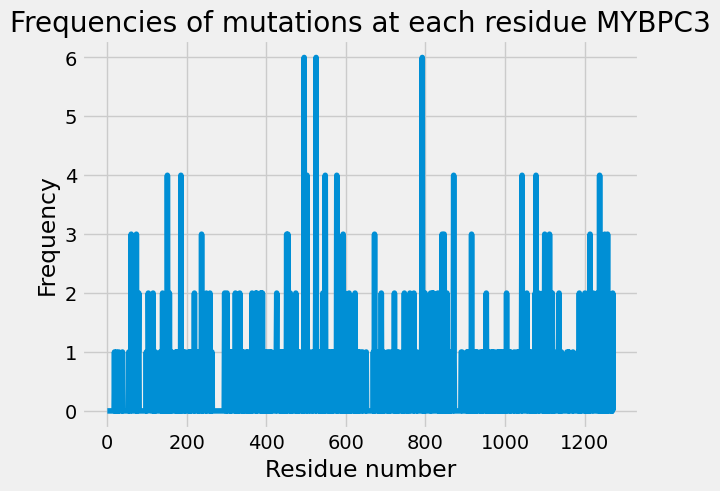

In [76]:
num_amino_acids_mybpc3 = 1274

count = [0] * num_amino_acids_mybpc3

for i in combined_mybpc3.index:
    s = combined_mybpc3['Protein change'][i].replace('*', '')
    x = "".join([ele for ele in s if ele.isnumeric()])
    if x:
        x_value = int(x)
        count[x_value] += 1
        
    
# x axis values
x = [i for i in range(num_amino_acids_mybpc3)]
# corresponding y axis values
y = count
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('Residue number')
# naming the y axis
plt.ylabel('Frequency')
  
# giving a title to my graph
plt.title('Frequencies of mutations at each residue MYBPC3')
  
# function to show the plot
plt.show()

# save figure
# plt.savefig('mybpc3.png')

plt.close()

In [71]:
f = open("mybpc3_mutationfreq.txt", "w")
f.write("attribute: position\n")
f.write("recipient: residues\n")
for i in range(num_amino_acids_mybpc3):
    f.write("\t" + ":" + str(i+1) + "\t" + str(count[i]) + "\n")
f.close()

In [77]:
# pathogenic tnnt2
tnnt2 = pd.read_csv('Data-for-Project/Data/TNNT2.txt', sep = "\t")

# filtering for HCM conditions
tnnt2_HCM = tnnt2['Condition(s)'].str.contains("Hypertrophic cardiomyopathy")

# filtering for non-NaN protein changes
tnnt2_filtered = tnnt2[tnnt2_HCM].dropna(subset = ["Protein change"])

# likely pathogenic tnnt2
tnnt2_lp = pd.read_csv('Data-for-Project/Data/TNNT2_LP.txt', sep='\t')
tnnt2_HCM_lp = tnnt2_lp['Condition(s)'].str.contains("Hypertrophic cardiomyopathy")
tnnt2_filtered_lp = tnnt2_lp[tnnt2_HCM_lp].dropna(subset=['Protein change'])

# combine pathogenic and likely pathogenic
combined_tnnt2 = [tnnt2_filtered, tnnt2_filtered_lp]
combined_tnnt2 = pd.concat(combined_tnnt2)
combined_tnnt2 = combined_tnnt2.reset_index()

combined_tnnt2.head(5)

,index,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
0,0,NM_001276345.2(TNNT2):c.891G>A (p.Trp297Ter),TNNT2,"W287*, W294*, W284*, W281*, W254*, W297*",Hypertrophic cardiomyopathy|not provided|Dilat...,Pathogenic/Likely pathogenic(Last reviewed: Se...,"criteria provided, multiple submitters, no con...",VCV000181636,1,201328344,1,201359216,181636,178913,rs730881116,NC_000001.11:201359215:C:T,NaN
1,1,NM_001276345.2(TNNT2):c.890G>A (p.Trp297Ter),TNNT2,"W287*, W294*, W281*, W284*, W254*, W297*",Cardiovascular phenotype|not provided|Hypertro...,Pathogenic/Likely pathogenic(Last reviewed: Se...,"criteria provided, multiple submitters, no con...",VCV000177636,1,201328345,1,201359217,177636,172354,rs727504247,NC_000001.11:201359216:C:T,NaN
2,5,NM_001276345.2(TNNT2):c.650AGA[3] (p.Lys220del),TNNT2,"K210del, K217del, K177del, K204del, K207del, K...",Cardiovascular phenotype|not provided|Dilated ...,Pathogenic/Likely pathogenic(Last reviewed: Oc...,"criteria provided, multiple submitters, no con...",VCV000043659,1,201331099 - 201331101,1,201361971 - 201361973,43659,52828,rs45578238,NC_000001.11:201361970:TCTTCTTCTTCTT:TCTTCTTCTT,NaN
3,6,NM_001276345.2(TNNT2):c.566C>T (p.Ser189Phe),TNNT2,"S179F, S189F, S149F, S174F",Cardiovascular phenotype|Hypertrophic cardiomy...,Pathogenic/Likely pathogenic(Last reviewed: Au...,"criteria provided, multiple submitters, no con...",VCV000177634,1,201332458,1,201363330,177634,172499,rs727504246,NC_000001.11:201363329:G:A,NaN
4,7,NM_001276345.2(TNNT2):c.548G>A (p.Arg183Gln),TNNT2,"R173Q, R183Q, R143Q, R168Q",Cardiovascular phenotype|not provided|Dilated ...,Pathogenic/Likely pathogenic(Last reviewed: Au...,"criteria provided, multiple submitters, no con...",VCV000043649,1,201332476,1,201363348,43649,52818,rs397516471,NC_000001.11:201363347:C:T,NaN


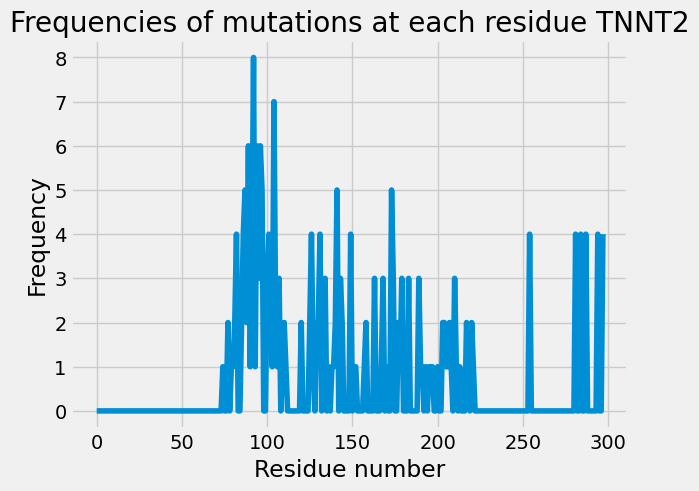

In [81]:
num_amino_acids_tnnt2 = 298

count = [0] * num_amino_acids_tnnt2

for i in combined_tnnt2.index:
    s = combined_tnnt2['Protein change'][i].replace('*', '').split(',')
    for j in s:
        x = "".join([ele for ele in j if ele.isnumeric()])
        if x:
            x_value = int(x)
            count[x_value] += 1
        
    
# x axis values
x = [i for i in range(num_amino_acids_tnnt2)]
# corresponding y axis values
y = count
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('Residue number')
# naming the y axis
plt.ylabel('Frequency')
  
# giving a title to my graph
plt.title('Frequencies of mutations at each residue TNNT2')
  
# function to show the plot
plt.show()

# save figure
# plt.savefig('mybpc3.png')

plt.close()

In [82]:
f = open("tnnt2_mutationfreq.txt", "w")
f.write("attribute: position\n")
f.write("recipient: residues\n")
for i in range(num_amino_acids_tnnt2):
    f.write("\t" + ":" + str(i+1) + "\t" + str(count[i]) + "\n")
f.close()

In [83]:
# pathogenic tpm1
tpm1 = pd.read_csv('Data-for-Project/Data/TPM1.txt', sep = "\t")

# filtering for HCM conditions
tpm1_HCM = tpm1['Condition(s)'].str.contains("Hypertrophic cardiomyopathy")

# filtering for non-NaN protein changes
tpm1_filtered = tpm1[tpm1_HCM].dropna(subset = ["Protein change"])

# likely pathogenic tpm1
tpm1_lp = pd.read_csv('Data-for-Project/Data/tpm1_LP.txt', sep='\t')
tpm1_HCM_lp = tpm1_lp['Condition(s)'].str.contains("Hypertrophic cardiomyopathy")
tpm1_filtered_lp = tpm1_lp[tpm1_HCM_lp].dropna(subset=['Protein change'])

# combine pathogenic and likely pathogenic
combined_tpm1 = [tpm1_filtered, tpm1_filtered_lp]
combined_tpm1 = pd.concat(combined_tpm1)
combined_tpm1 = combined_tpm1.reset_index()

combined_tpm1.head(5)

,index,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
0,0,NM_001018005.2(TPM1):c.284T>C (p.Val95Ala),TPM1,"V95A, V137A, V59A",Cardiovascular phenotype|not provided|Hypertro...,Pathogenic/Likely pathogenic(Last reviewed: Ma...,"criteria provided, multiple submitters, no con...",VCV000012457,15,63349227,15.0,63057028,12457,27496,rs104894504,NC_000015.10:63057027:T:C,NaN
1,1,NM_001018005.2(TPM1):c.523G>A (p.Asp175Asn),TPM1,"D175N, D139N, D217N",Cardiovascular phenotype|not provided|Cardiomy...,"Pathogenic(Last reviewed: Oct 22, 2022)","criteria provided, multiple submitters, no con...",VCV000012456,15,63353098,15.0,63060899,12456,27495,rs104894503,NC_000015.10:63060898:G:A,NaN
2,2,NM_001018005.2(TPM1):c.539A>G (p.Glu180Gly),TPM1,"E180G, E222G, E144G",not provided|Hypertrophic cardiomyopathy,"Pathogenic(Last reviewed: May 30, 2022)","criteria provided, multiple submitters, no con...",VCV000012455,15,63353114,15.0,63060915,12455,27494,rs104894502,NC_000015.10:63060914:A:G,NaN
3,3,NM_001018005.2(TPM1):c.574G>A (p.Glu192Lys),TPM1,"E192K, E156K, E234K",Cardiovascular phenotype|not provided|Cardiomy...,Pathogenic/Likely pathogenic(Last reviewed: No...,"criteria provided, multiple submitters, no con...",VCV000031882,15,63353922,15.0,63061723,31882,40542,rs199476315,NC_000015.10:63061722:G:A,NaN
4,4,NM_001018005.2(TPM1):c.644C>T (p.Ser215Leu),TPM1,"S215L, S179L, S257L",Cardiovascular phenotype|not provided|Cardiomy...,Pathogenic/Likely pathogenic(Last reviewed: Oc...,"criteria provided, multiple submitters, no con...",VCV000031883,15,63354418,15.0,63062219,31883,40543,rs199476316,NC_000015.10:63062218:C:T,NaN


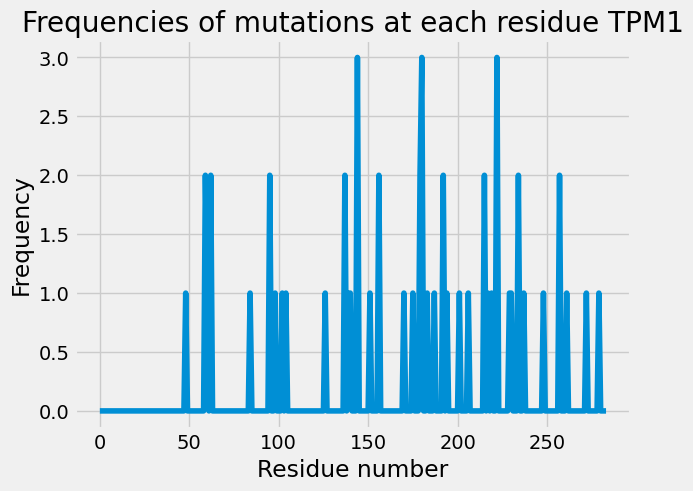

In [84]:
num_amino_acids_tpm1 = 284

count = [0] * num_amino_acids_tpm1

for i in combined_tpm1.index:
    s = combined_tpm1['Protein change'][i].replace('*', '').split(',')
    for j in s:
        x = "".join([ele for ele in j if ele.isnumeric()])
        if x:
            x_value = int(x)
            count[x_value] += 1
        
    
# x axis values
x = [i for i in range(num_amino_acids_tpm1)]
# corresponding y axis values
y = count
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('Residue number')
# naming the y axis
plt.ylabel('Frequency')
  
# giving a title to my graph
plt.title('Frequencies of mutations at each residue TPM1')
  
# function to show the plot
plt.show()

# save figure
# plt.savefig('mybpc3.png')

plt.close()

In [ ]:
f = open("tpm1_mutationfreq.txt", "w")
f.write("attribute: position\n")
f.write("recipient: residues\n")
for i in range(num_amino_acids_tpm1):
    f.write("\t" + ":" + str(i+1) + "\t" + str(count[i]) + "\n")
f.close()

In [75]:
# pathogenic mybpc3
mybpc3_ensembl = pd.read_csv('mybpc3_ensembl.txt', sep = "\t")
mybpc3_ensembl = mybpc3_ensembl[mybpc3_ensembl['SYMBOL'].str.contains('MYBPC3')]
# mybpc3_ensembl = mybpc3_ensembl[mybpc3_ensembl['Consequence'].str.contains('stop_gained', 'frameshift_variant', 'missense_variant')]
mybpc3_ensembl = mybpc3_ensembl[['#Uploaded_variation', 'Consequence', 'IMPACT']]
mybpc3_ensembl = mybpc3_ensembl.rename(columns={"#Uploaded_variation": "Name"})

mybpc3_ensembl

# main_mybpc3 = combined_mybpc3.merge(mybpc3_ensembl, on='Name')
# main_mybpc3

,Name,Consequence,IMPACT
5,NM_000256.3(MYBPC3):c.3811C>T,stop_gained,HIGH
13,NM_000256.3(MYBPC3):c.3811C>T,downstream_gene_variant,MODIFIER
14,NM_000256.3(MYBPC3):c.3811C>T,stop_gained,HIGH
28,NM_000256.3(MYBPC3):c.3811C>T,stop_gained,HIGH
36,NM_000256.3(MYBPC3):c.3811C>T,downstream_gene_variant,MODIFIER
...,...,...,...
3525,NM_000256.3(MYBPC3):c.86del,"frameshift_variant,NMD_transcript_variant",HIGH
3526,NM_000256.3(MYBPC3):c.86del,frameshift_variant,HIGH
3530,NM_000256.3(MYBPC3):c.51dup,frameshift_variant,HIGH
3532,NM_000256.3(MYBPC3):c.51dup,"frameshift_variant,NMD_transcript_variant",HIGH


In [73]:
combined_mybpc3.head(5)

,index,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
0,3,NM_000256.3(MYBPC3):c.3811C>T (p.Arg1271Ter),MYBPC3,R1271*,Hypertrophic cardiomyopathy 4|Left ventricular...,Pathogenic/Likely pathogenic(Last reviewed: Oc...,"criteria provided, multiple submitters, no con...",VCV000042744,11.0,47353626,11.0,47332075,42744,51914,rs397516042,NC_000011.10:47332074:G:A,NaN
1,4,NM_000256.3(MYBPC3):c.3805G>T (p.Glu1269Ter),MYBPC3,E1269*,Hypertrophic cardiomyopathy 4,"Pathogenic(Last reviewed: Sep 1, 2022)","criteria provided, single submitter",VCV001705335,11.0,47353632,11.0,47332081,1705335,1701424,NaN,NC_000011.10:47332080:C:A,NaN
2,5,NM_000256.3(MYBPC3):c.3799del (p.Arg1267fs),MYBPC3,R1267fs,Hypertrophic cardiomyopathy 4|Hypertrophic car...,"Pathogenic(Last reviewed: Sep 1, 2022)","criteria provided, multiple submitters, no con...",VCV000651464,11.0,47353638,11.0,47332087,651464,640091,rs1595840648,NC_000011.10:47332086:GG:G,NaN
3,6,NM_000256.3(MYBPC3):c.3779del (p.Gly1260fs),MYBPC3,G1260fs,Hypertrophic cardiomyopathy,"Pathogenic(Last reviewed: Oct 29, 2022)","criteria provided, single submitter",VCV001959572,11.0,47353658,11.0,47332107,1959572,2019706,NaN,NC_000011.10:47332106:CCC:CC,NaN
4,8,NM_000256.3(MYBPC3):c.3773T>A (p.Leu1258Ter),MYBPC3,L1258*,Hypertrophic cardiomyopathy,"Pathogenic(Last reviewed: Jul 5, 2022)","criteria provided, single submitter",VCV001452999,11.0,47353664,11.0,47332113,1452999,1432139,NaN,NC_000011.10:47332112:A:T,NaN


In [15]:
# pathogenic myh7
myh7 = pd.read_csv('Data-for-Project/Data/clinvar_result.txt', sep = "\t")

# filtering for only myh7
myh7 = myh7[myh7['Gene(s)'].str.contains('MYH7')]

# filtering for HCM conditions
myh7_HCM = myh7['Condition(s)'].str.contains("Hypertrophic cardiomyopathy")

# filtering for non-NaN protein changes
myh7_filtered = myh7[myh7_HCM].dropna(subset = ["Protein change"])

# show first 5 rows
myh7_filtered.head(5)

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
15,NM_000257.4(MYH7):c.5800G>A (p.Glu1934Lys),MYH7,E1934K,Hypertrophic cardiomyopathy|not provided|Cardi...,"Uncertain significance(Last reviewed: Aug 13, ...","criteria provided, multiple submitters, no con...",VCV000181292,14,23882071,14,23412862,181292,179463,rs730880825,NC_000014.9:23412861:C:T,NaN
16,NM_000257.4(MYH7):c.5798A>T (p.Asn1933Ile),MYH7,N1933I,Hypertrophic cardiomyopathy,"Uncertain significance(Last reviewed: Aug 14, ...","criteria provided, single submitter",VCV001477804,14,23882073,14,23412864,1477804,1436683,NaN,NC_000014.9:23412863:T:A,NaN
17,NM_000257.4(MYH7):c.5798A>G (p.Asn1933Ser),MYH7,N1933S,Hypertrophic cardiomyopathy,"Uncertain significance(Last reviewed: Sep 1, 2...","criteria provided, single submitter",VCV001352285,14,23882073,14,23412864,1352285,1482821,NaN,NC_000014.9:23412863:T:C,NaN
24,NM_000257.4(MYH7):c.5789A>C (p.Lys1930Thr),MYH7,K1930T,Hypertrophic cardiomyopathy,"Uncertain significance(Last reviewed: Apr 17, ...","criteria provided, single submitter",VCV002127118,14,23882969,14,23413760,2127118,2178431,NaN,NC_000014.9:23413759:T:G,NaN
25,NM_000257.4(MYH7):c.5786C>T (p.Thr1929Met),MYH7,T1929M,Cardiovascular phenotype|not provided|Cardiomy...,"Uncertain significance(Last reviewed: Feb 7, 2...","criteria provided, multiple submitters, no con...",VCV000181397,14,23882972,14,23413763,181397,179464,rs730880918,NC_000014.9:23413762:G:A,NaN


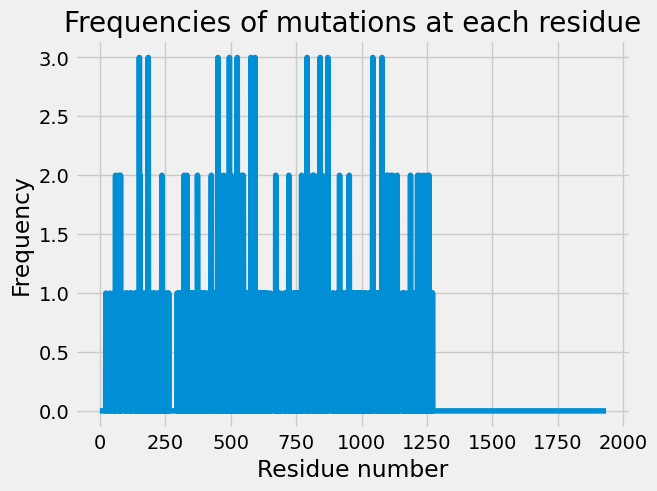

In [16]:
num_amino_acids_myh7 = 1935

count = [0] * num_amino_acids_myh7

for i in mybpc3_filtered.index:
    s = str(mybpc3_filtered['Protein change'][i])
    x_value = int("".join([ele for ele in s if ele.isdigit()]))
    count[x_value] += 1
    
# x axis values
x = [i for i in range(num_amino_acids_myh7)]
# corresponding y axis values
y = count
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('Residue number')
# naming the y axis
plt.ylabel('Frequency')
  
# giving a title to my graph
plt.title('Frequencies of mutations at each residue')
  
# function to show the plot
plt.show()

In [17]:
f = open("myh7_mutationfreq.txt", "w")
f.write("attribute: position\n")
f.write("recipient: residues\n")
for i in range(num_amino_acids_myh7):
    f.write("\t" + ":" + str(i+1) + "\t" + str(count[i]) + "\n")
f.close()